# TensorFlow 2.0 alpha - Word Embeddings
### Use the Embedding Projector - IMDb Movie Review dataset

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Representing Text as Numbers
#### ML models take vectors as input - There are a number of ways to convert text to numbers

### 1. One-Hot Encodings
#### Represent vocabulary with a zero vector equal to length(vocabulary) - assign 1s to indices corresponding to the words
#### Downside - with 10,000 words, one-hot encoding each would create a vector with 99.99 % 0s

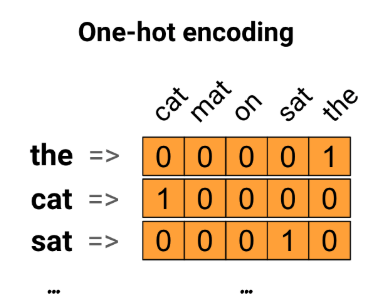

### 2. Encode with a Unique Number
#### Assign more numbers than 0 and 1, leaving a Dense vector where all elements are full
#### Downside - arbitrary encoding, no relationship between words - different words with similar encodings may make model interpretation more difficult

### 3. Word Embeddings
#### The weights associated with words are learned during training - embeddings are dense vectors of floating point values - often called 'lookup table'

## Embedding Layer
#### The layer is a Lookup Table, mapping from integer indices to dense vectors - when created, the Weights are generated randomly, and adjusted during training through backpropagation - Once learned, word embeddings will encode similarities between words - Layer takes 2D tensors (samples, sequence_length) as input - Sequences in a batch must have same length - Layers output 3D tensors (samples, sequence_length, embedding_dimensionality)

## Learning Embeddings from Scratch
#### Train a Sentiment Classifier on IMDb movie reviews

In [2]:
vocab_size = 10000
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## Convert Integers back to Words
#### Create a helper function to query a dictionary object that contains the integer to string mapping

In [4]:
# dictionary mapping words to integer index

word_index = imdb.get_word_index()

# first indices are reversed

word_index = {k:(v+3) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

#### pad_sequences - standardize lengths of reviews

In [5]:
maxlen = 500

train_data = keras.preprocessing.sequence.pad_sequences(train_data, 
                                                       value=word_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index['<PAD>'],
                                                      padding='post',
                                                      maxlen=maxlen)

In [6]:
# Inspect the 1st padded review

print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## Create a Simple Model
#### Use Keras Sequential - 1st layer is Embedding - Next layer is GlobalAveragePooling1D, returning a fixed length output - then a Dense layer - Final Dense layer to a single output node

In [9]:
embedding_dim=16

model=keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


## Compile and Train Model

In [10]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(
    train_data,
    train_labels,
    epochs=30,
    batch_size=512,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 2s 122us/sample - loss: 0.6922 - accuracy: 0.5370 - val_loss: 0.6906 - val_accuracy: 0.5988
Epoch 2/30
20000/20000 [==============================] - 2s 97us/sample - loss: 0.6869 - accuracy: 0.5888 - val_loss: 0.6820 - val_accuracy: 0.6202
Epoch 3/30
20000/20000 [==============================] - 2s 92us/sample - loss: 0.6754 - accuracy: 0.7275 - val_loss: 0.6663 - val_accuracy: 0.7570
Epoch 4/30
20000/20000 [==============================] - 2s 94us/sample - loss: 0.6545 - accuracy: 0.7666 - val_loss: 0.6394 - val_accuracy: 0.7686
Epoch 5/30
20000/20000 [==============================] - 2s 91us/sample - loss: 0.6216 - accuracy: 0.7943 - val_loss: 0.6017 - val_accuracy: 0.7914
Epoch 6/30
20000/20000 [==============================] - 2s 100us/sample - loss: 0.5785 - accuracy: 0.8109 - val_loss: 0.5572 - val_accuracy: 0.8048
Epoch 7/30
20000/20000 [==============================]

#### Model is overfitting - validation accuracy around 89 %

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))

plt.show()

<Figure size 1200x900 with 1 Axes>

## Retrieve the Learned Embeddings
#### Matrix of shape (vocab_size, embedding-dimension)

In [12]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


### To use Embedding Projector - upload 2 files in .tsv format - File of vectors (embedding), and File of meta data (words)

In [13]:
# Write weights to disk

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

## Visualize the Embeddings

### Using Embedding Projector

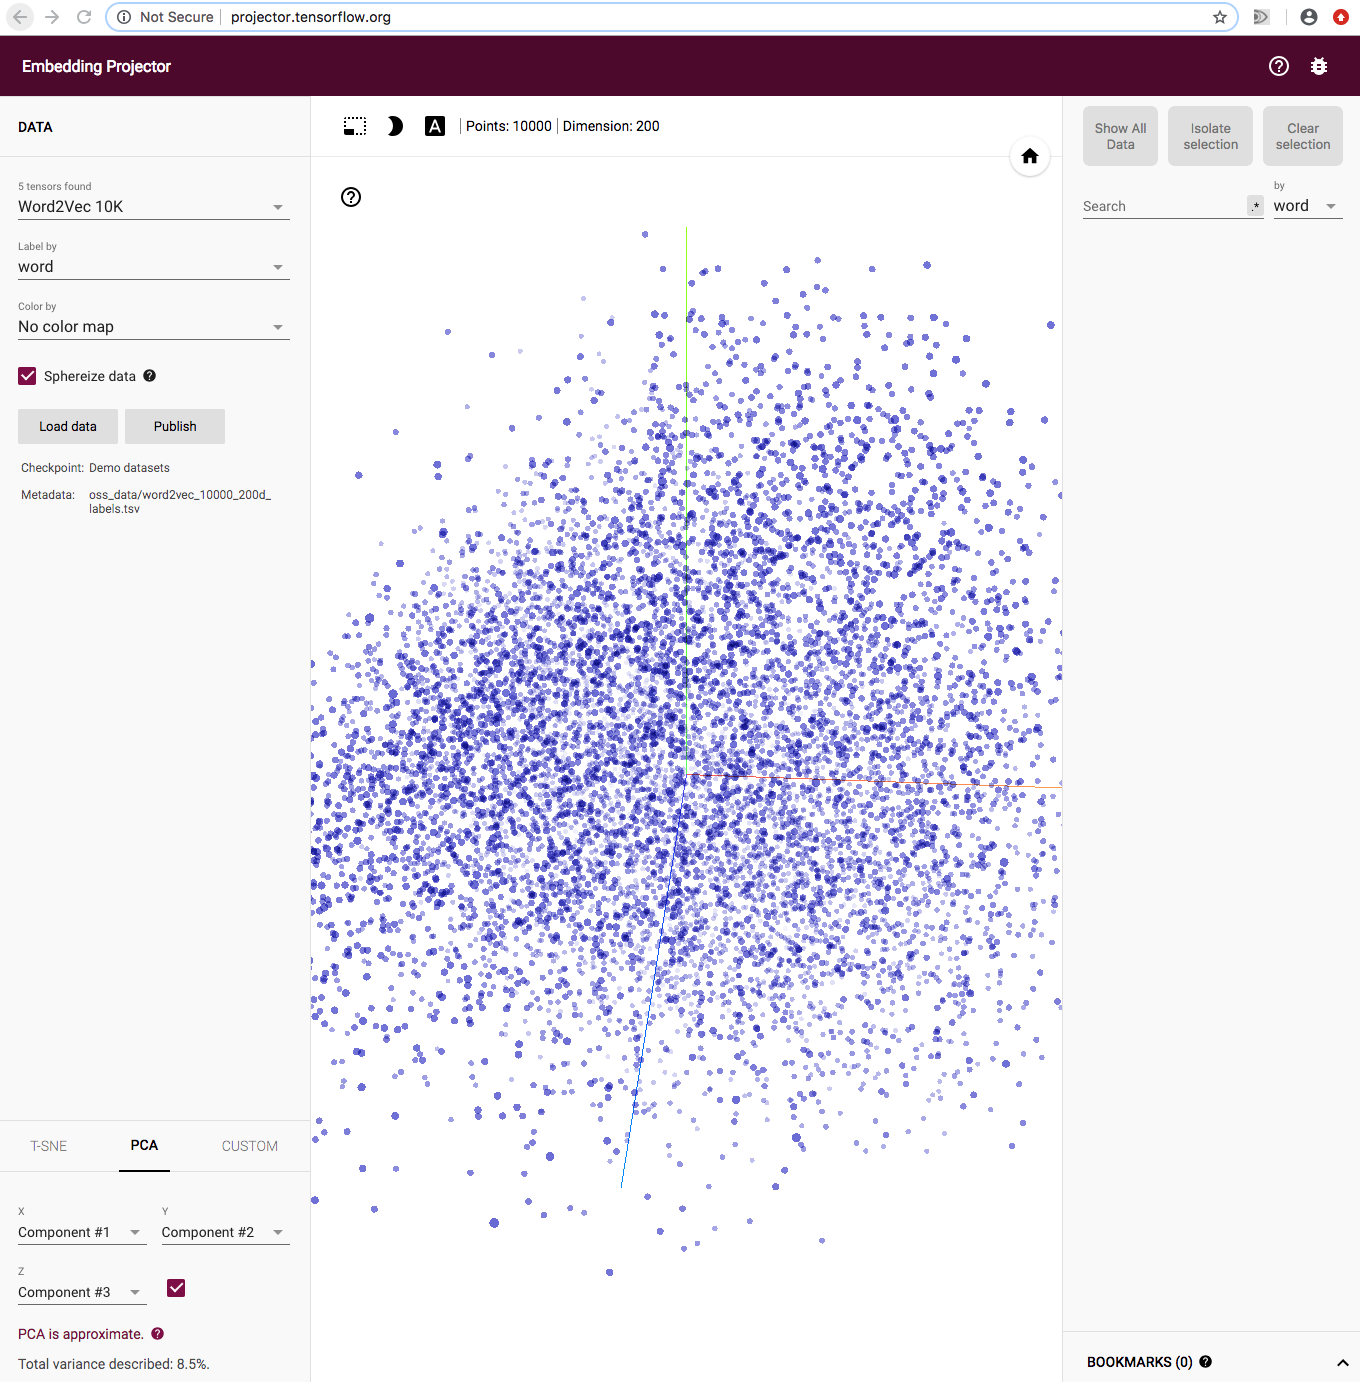

### With the Projector - click 'Load Data' and select above files, vecs.tsv and meta.tsv

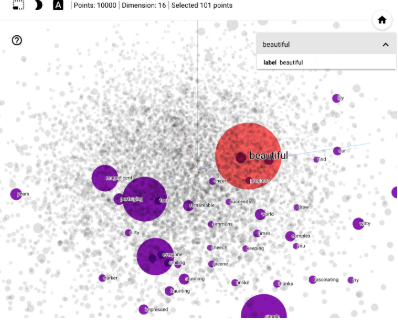

#### Files may possibly be downloaded to the local machine with the following:

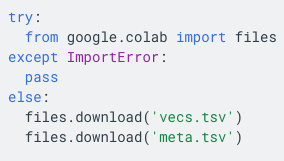